
# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project investigates the No Show Medical appointments in Brazil. Data was downloaded as csv file. The investigation sought to reveal data relatioships that would assist in revealing What factors are important in predicting whether a patient will show up for their scheduled appointment. The data set had 110527 rows and 14 columns (inlcuding no show column). They include  the PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show columns. 

Some columns could not predict whether a patient could show up or no. They include patientID and AppointmentID. Idearly, there are several factors that could influence the showing up of a patient that include Gender, Schedule day, Neigbourhood, Age, Type of deseases, social protection scheme, and reminders. However this analysis focused on only theree social-economic variables that include age of the patient (Age), the day patient set up their appointment (ScheduleDay), and social welfare factor (Scholarship) as the independent variables. The dependent variable was represented by No-Show.       


### Question(s) for Analysis
The following Research questions were formulated 

- i. What is the relatinship between Gender and patient's No-show?
- ii. What is the relatinship between Age and patient's No-show?
- iii. What is the relatinship between Scholarship and patient's No-show?

In [1]:

# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.3MB/s eta 0:00:01   65% |████████████████████▉           | 6.8MB 33.2MB/s eta 0:00:01    80% |█████████████████████████▊      | 8.4MB 32.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.2MB/s eta 0:00:01   37% |████████████                    | 5.0MB 31.3MB/s eta 0:00:01    48% |███████████████▋                | 6.6MB 29.7MB/s eta 0:00:01    83% |██████████████████████████▋     | 11.2MB 28.2MB/s eta 0:00:01    93% |█████████████████████████████▉  | 12.5MB 29.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

First, the data set in csv file was read using pandas.
Then the data frame head was printed to view the columns and rows as well as the type of data in the dataset. 
Data was assessed to identify cases of missing data, incorrect data types, and duplicates. There were no duplicate or missing data in the data set. However, Schedule day and appointment day needed to be tranformed from obejct. 


### General Properties
The data was ready for exploration after cleaning.

In [9]:
# Reading the Csv File
data= pd.read_csv('appointments_data.csv')
df_app = pd.DataFrame(data)
print('\n-------This is the data frame head--------\n')
print(df_app.head())


-------This is the data frame head--------

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0    

In [12]:
#Assessing the shape of the dataframe
print('\n-------The shape of the data frame is--------\n')
print(df_app.shape)

# Missing Data 
# Checking null
df_app.isnull().sum()



-------The shape of the data frame is--------

(110527, 14)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
# Checking Data frame information
print(df_app.info())
print ("\n   No missing values found since all 14 columns have 110527 entries    \n")

#Duplicated Data
print("Number of Duplicated Records are:") 
print(sum(df_app.duplicated()))

#Incorenct Data Types
print("\n----------The following are the data types-------\n")
print(df_app.dtypes)

print("\n       ScheduledDay and AppointmentDay need cleaning \n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

   No missing values found since all 14 columns have 110527 entries    

Number of Duplicated Records are:
0

----------The following are the data types-------

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay  


### Data Cleaning
Schedule day and appointment day needed to be tranformed from obejct to date time using to_datetime function. 
 

In [14]:
# Data cleaning 
df_app['ScheduledDay'] = pd.to_datetime(df_app['ScheduledDay'])
df_app['AppointmentDay'] = pd.to_datetime(df_app['AppointmentDay'])
print("\n----------The following data is now clean-------\n")
print(df_app.info())



----------The following data is now clean-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB
None


In [15]:
# Creating cartegorical colum for No Show
df_app["Showed_up"]= df_app['No-show'].map(lambda x: 0 if x=='Yes' else 1) #function to transform NO show Yes to 0, and NO to 1
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


<a id='eda'></a>
## Exploratory Data Analysis

Descriptive statistics were performed using describe() function.

Histogram were also used to visualize the distribution 
Analysis of those who showed up and NO show counted and ploted was performed 

In [16]:
# Descriptive statistics
print(df_app.describe())


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

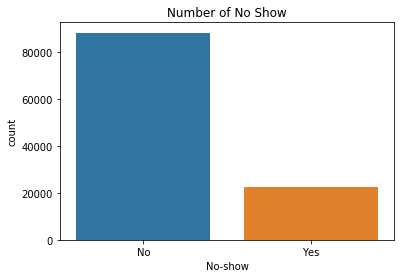

In [18]:
#Exploring number of those showed up for appointment and those who did not as teh target variable 
#No Show 


The target variable (Y) shows most people did show up (No) and few others did not (Yes). There could be several variables associated with No show. First, we explore the three earleir identified (Gender, Age, and scholarship) before assessing the others.

 


### Research Question 1 - What is the relatinship between Gender and patient's No-show?


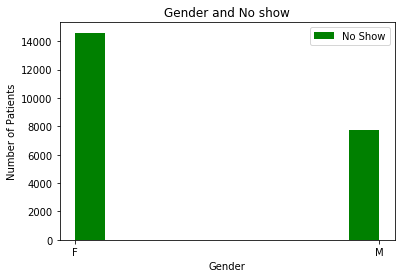

In [25]:
# Ploting Gender and No show relationship

plt.hist(df_app.Gender[df_app.Showed_up ==False], 10, facecolor='g', alpha=1, label= 'No Show');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.title('Gender and No show')
plt.show()

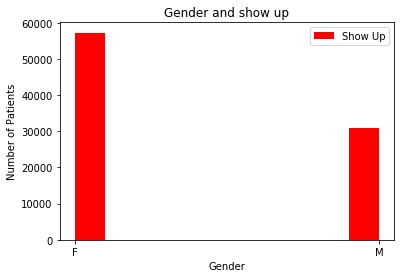

In [26]:
plt.hist(df_app.Gender[df_app.Showed_up ==True], 10, facecolor='r', alpha=1, label= 'Show Up');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.title('Gender and show up')
plt.show()

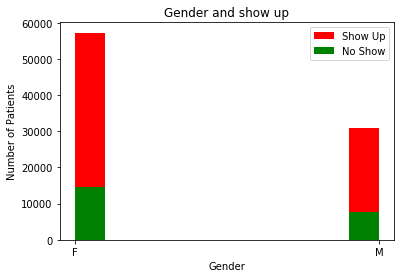

In [27]:
plt.hist(df_app.Gender[df_app.Showed_up ==True], 10, facecolor='r', alpha=1, label= 'Show Up');
plt.hist(df_app.Gender[df_app.Showed_up ==False], 10, facecolor='g', alpha=1, label= 'No Show');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.title('Gender and show up')
plt.show()

In [33]:
df_app[['Gender', 'Showed_up']].groupby(['Gender'], as_index=False).mean().sort_values(by='Showed_up', ascending=False)

,Gender,Showed_up
1,M,0.800321
0,F,0.796854


### Research Question 2  - What is the relatinship between Age and patient's No-show?


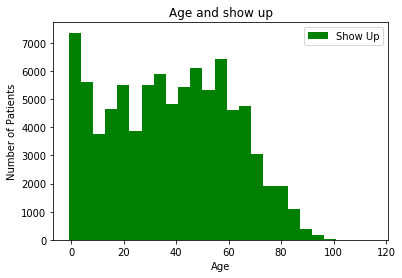

In [29]:
# Ploting Age and No show relationship
plt.hist(df_app.Age[df_app.Showed_up ==True], 25, facecolor='g', alpha=1, label= 'Show Up');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.title('Age and show up')
plt.show()

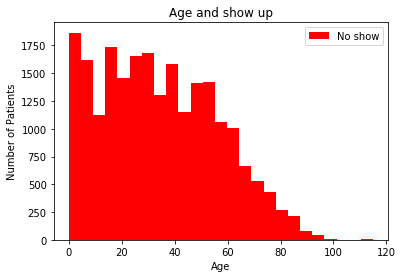

In [31]:
plt.hist(df_app.Age[df_app.Showed_up ==False], 25, facecolor='r', alpha=1, label= 'No show');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.title('Age and show up')
plt.show()

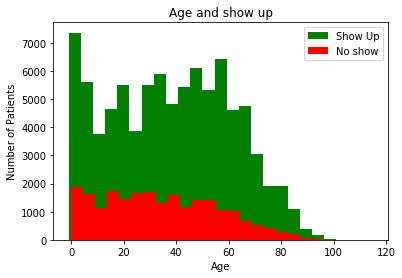

In [32]:
plt.hist(df_app.Age[df_app.Showed_up ==True], 25, facecolor='g', alpha=1, label= 'Show Up');
plt.hist(df_app.Age[df_app.Showed_up ==False], 25, facecolor='r', alpha=1, label= 'No show');
plt.legend()
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.title('Age and show up')
plt.show()

### Research Question 3- What is the relatinship between Scholarship and patient's No-show?

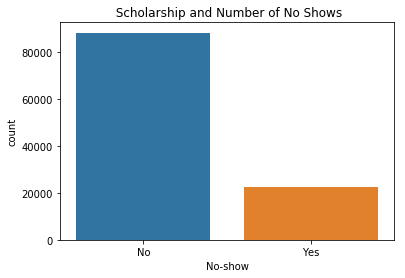

In [36]:
# Ploting Scholarship and No show relationship
sns.countplot(x='No-show', data=df_app).set(title=" Scholarship and Number of No Shows")
plt.legend()

In [34]:
df_app[['Scholarship', 'Showed_up']].groupby(['Scholarship'], as_index=False).mean().sort_values(by='Showed_up', ascending=False)

,Scholarship,Showed_up
0,0,0.801928
1,1,0.762637


In [1]:
#Defining a function to calculate probabilities 
def show_rate(g, s):
    '''This function will calculate the probability of No show given two independent variables' probabilities '''
    print ("The probability of a female patient showing up is", g)
    print("The probability of a person enrolled in Scholarship showing up is",  s)
    r= (g*s)
    print("The probability of a person enrolled in scholarship being a female is", r)
    return r
    
show_rate(0.796854, 0.801928)

The probability of a female patient showing up is 0.796854
The probability of a person enrolled in Scholarship showing up is 0.801928
The probability of a person enrolled in scholarship being a female is 0.6390195345119999


0.6390195345119999

<a id='conclusions'></a>
## Conclusions
## Results 
- The results indicates that more female patients showed up for appointments than male counterparts. However, it was 80% male showing up compared to 79% for females. 
- People aged 60 and above were more likely to fail to show up for appointments. Similarly, those in the same age brackets showed up more.
- People enrolled in scholarship are more likely to show up for appointments than those who are not. However, this difference is very insignificant because it about 4 % only. 

The three varaiables has influence on No-Show behavior witnessed. However, further investigation to reveal the actual relationship and causes can be done on this data set. 
## Limitations
- This investigation did not explore other varaibles that affect the target variableeg conditions like Diabetes, Handicup or effect of SMS received. 
- The data is majorly cartegorical, which made it dificult to carry tests that reveal statstical relations and corelations 
- The data was insufficient to make conclsuions 




In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0